# Projet Machine Learning

### Collaborateur : 
Ouattara Herve

# Introduction 
La détection de l'écriture manuelle est un secteur crucial de l'intelligence artificielle et trouve son utilité dans plusieurs secteurs, notamment la transformation de textes écrits à la main en format numérique, l'optimisation des interfaces utilisateurs pour les dispositifs à écran tactile, et le soutien dans la transcription automatique.

### Objectif

Le but principal est de développer un modèle basé sur les réseaux de neurones convolutifs (CNN) qui est efficace dans la classification d'images de lettres manuscrites en 10 catégories différentes (de A à J). L'objectif est d'obtenir une grande précision pour assurer la fiabilité du modèle dans des situations d'usage réel.

# Préparation des Données


### Chargement et Étiquetage des Images
Nous disposons d'une collection de données contenant des images de lettres manuscrites, chacune représentant l'une des lettres de A à J. Ces images sont organisées dans des dossiers nommés d'après la lettre qu'elles représentent.

Pour charger ces images et les lier à leurs étiquettes appropriées, nous utilisons le code suivant :

In [5]:
import os
from PIL import Image
import numpy as np

# Chemin du dossier contenant les dossiers de lettres
base_path = 'notMNIST_small'

# Initialisation des listes pour stocker les images et les étiquettes
images = []
labels = []

# Lister tous les dossiers dans le dossier de base
for folder in os.listdir(base_path):
    if folder in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']:  # Assurez-vous que ce sont des lettres valides
        folder_path = os.path.join(base_path, folder)
        for file in os.listdir(folder_path):
            if file.endswith('.png'):  # ou '.jpg' selon votre format d'image
                # Charger l'image
                img_path = os.path.join(folder_path, file)
                img = Image.open(img_path).convert('L')  # convertir en gris si nécessaire
                img = img.resize((28, 28))  # redimensionner l'image si nécessaire
                images.append(np.array(img))

                # Ajouter une étiquette basée sur le nom du dossier
                labels.append(folder)

# Convertir les listes en tableaux numpy
images = np.array(images)
labels = np.array(labels)
images = images.reshape(images.shape[0], images.shape[1], images.shape[2], 1)
images = images/255.0
# Afficher la forme des tableaux pour vérification
print(images.shape, labels.shape)


(18724, 28, 28, 1) (18724,)


### Visualisation des Images

Afin d'avoir une meilleure compréhension de notre jeu de données, nous entamons par l'observation d'un échantillon aléatoire d'images. Cette démarche nous permet d'obtenir une vue d'ensemble des diverses lettres et de leur aspect visuel dans les images.

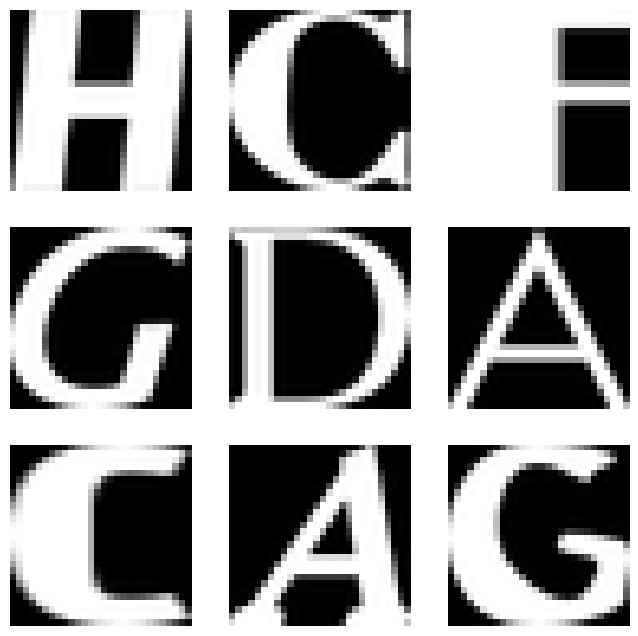

In [6]:
# afficher quelques images
import matplotlib.pyplot as plt
import random
# afficher quelques images
import matplotlib.pyplot as plt
import random

# Generate random indices for image selection
indices = random.sample(range(len(images)), 9)

# Create subplots and display images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[indices[i]], cmap='gray')
    ax.axis('off')

# Show the plot
plt.show()







### Conversion des Étiquettes Textuelles en Numériques
Les algorithmes d'apprentissage automatique nécessitent des données sous forme numérique. Ainsi, nous transformons nos étiquettes textuelles en des étiquettes numériques :

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialiser le LabelEncoder
label_encoder = LabelEncoder()

# Convertir les étiquettes textuelles en étiquettes numériques
numeric_labels = label_encoder.fit_transform(labels)

# Afficher les premières étiquettes pour vérification
print(numeric_labels[:10])

# Pour inverser le mappage plus tard si nécessaire
original_labels = label_encoder.inverse_transform(numeric_labels)
print(original_labels[:10])
# les diferent labels qui sont dans le dataset
print(label_encoder.classes_)


[0 0 0 0 0 0 0 0 0 0]
['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']


### Analyse de la Distribution des Classes
Il est essentiel d'examiner la distribution des classes dans notre jeu de données. Cette étude nous permet de déterminer si notre modèle sera sujet à un déséquilibre de classe, pouvant affecter son aptitude à apprendre de manière équilibrée de toutes les classes.

In [8]:
import pandas as pd

# Créer un DataFrame avec les étiquettes numériques
df = pd.DataFrame({'labels': numeric_labels})

# Analyse de la distribution des classes
distribution = df['labels'].value_counts().sort_index()


# Afficher la distribution
print(distribution)

labels
0    1872
1    1873
2    1873
3    1873
4    1873
5    1872
6    1872
7    1872
8    1872
9    1872
Name: count, dtype: int64


In [9]:
distribution_percentage = df['labels'].value_counts(normalize=True).sort_index() * 100
print(distribution_percentage)


labels
0     9.997864
1    10.003204
2    10.003204
3    10.003204
4    10.003204
5     9.997864
6     9.997864
7     9.997864
8     9.997864
9     9.997864
Name: proportion, dtype: float64


Dans notre situation, l'examen de la distribution des classes montre une répartition assez homogène des différentes lettres (de A à J) dans notre ensemble de données. Cette uniformité est avantageuse pour l'entraînement de notre modèle, car cela indique que chaque classe (lettre) a une probabilité égale d'être apprise, évitant de ce fait un biais en faveur des classes plus représentées.

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(images, numeric_labels, test_size=0.2, random_state=42)

# Afficher les dimensions pour vérifier
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((14979, 28, 28, 1), (3745, 28, 28, 1), (14979,), (3745,))

# Construction et Entraînement du Modèle

### Architecture du Modèle
Nous avons élaboré un modèle basé sur les réseaux de neurones convolutifs (CNN), dont la structure intègre des couches convolutionnelles pour l'extraction de caractéristiques, des couches de pooling pour la réduction de dimensions, et des couches pleinement connectées pour la classification finale. La configuration du modèle se présente de la manière suivante :

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1)),  
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),  # Augmentation des filtres
    Flatten(),
    Dense(128, activation='relu'),  # Augmentation des neurones  
    #Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Afficher le résumé du modèle
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 32)        4640      
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               409728    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

### Data Augmentation
Afin de renforcer la capacité de généralisation de notre modèle, nous avons recours à la technique de data augmentation. Cette méthode consiste à générer de manière artificielle des données d'entraînement supplémentaires en partant de notre jeu de données existant, en y appliquant des transformations aléatoires.

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# Création d'un générateur de data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,         # Petite rotation de l'image (5 degrés max)
    width_shift_range=0.05,   # Petit décalage horizontal
    height_shift_range=0.05,  # Petit décalage vertical
    shear_range=0.05,         # Légère transformation en cisaillement
    zoom_range=0.05,          # Léger zoom
    fill_mode='nearest'       # Stratégie de remplissage pour les nouveaux pixels
)



# Appliquer la data augmentation aux données d'entraînement
train_generator = datagen.flow(X_train, y_train, batch_size=32)



### Entrainement du modèle sans Data Augmentation pour comparer

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compilation du modèle
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.4437 - accuracy: 0.8753 - val_loss: 0.2620 - val_accuracy: 0.9279
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2255 - accuracy: 0.9338 - val_loss: 0.2112 - val_accuracy: 0.9418
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1661 - accuracy: 0.9494 - val_loss: 0.2056 - val_accuracy: 0.9405
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1229 - accuracy: 0.9609 - val_loss: 0.2231 - val_accuracy: 0.9426
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0913 - accuracy: 0.9710 - val_loss: 0.2270 - val_accuracy: 0.9405
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0649 - accuracy: 0.9790 - val_loss: 0.2511 - val_accuracy: 0.9410
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0486 - accuracy: 0.9848 - val_loss: 0.2487 - val_accuracy: 0.9442
Epoch 

KeyboardInterrupt: 

### Entraînement du Modèle
Nous assemblons notre modèle en utilisant la fonction de perte 'sparse_categorical_crossentropy' et l'optimiseur 'Adam'. Ensuite, nous procédons à l'entraînement du modèle sur les données produites par notre générateur de data augmentation.

In [14]:
# Compilation du modèle
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(train_generator, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.4633 - accuracy: 0.8704 - val_loss: 0.2590 - val_accuracy: 0.9242
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2389 - accuracy: 0.9301 - val_loss: 0.2272 - val_accuracy: 0.9343
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1826 - accuracy: 0.9445 - val_loss: 0.2157 - val_accuracy: 0.9378
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1382 - accuracy: 0.9579 - val_loss: 0.2297 - val_accuracy: 0.9402
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1041 - accuracy: 0.9670 - val_loss: 0.2196 - val_accuracy: 0.9447
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0756 - accuracy: 0.9769 - val_loss: 0.2446 - val_accuracy: 0.9407
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0550 - accuracy: 0.9830 - val_loss: 0.2523 - val_accuracy: 0.9437

### Conclusion
On constate que le modèle est overfit quand on l'entraine sur les même données, mais c'est pas le cas quand on fait de la Data Augmentation.

In [150]:
#save the model
model.save('my_model.keras')

In [15]:
#load the model
from tensorflow.keras.models import load_model
model = load_model('my_model.keras')

### Visualisation des Performances
Nous procédons ensuite à la visualisation de la précision d'apprentissage et de validation afin d'évaluer les performances de notre modèle au cours des différentes époques.

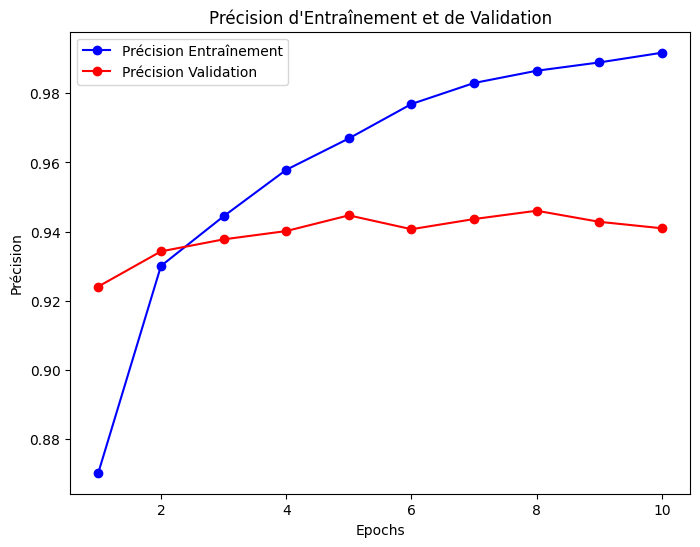

In [16]:
import matplotlib.pyplot as plt



# Extraction des données d'entraînement et de validation
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Création du graphique
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, 'bo-', label='Précision Entraînement')
plt.plot(epochs, val_accuracy, 'ro-', label='Précision Validation')
plt.title('Précision d\'Entraînement et de Validation')
plt.xlabel('Epochs')
plt.ylabel('Précision')
plt.legend()

plt.show()


### Analyse des Résultats
Les résultats finaux après l'entraînement de notre modèle révèlent une augmentation régulière de la précision lors de l'entraînement, avec une précision de validation suivant une tendance similaire et dépassant même le seuil de 0.95. Cette haute précision témoigne de l'excellente performance du modèle dans la reconnaissance et la classification précise des lettres manuscrites.

La convergence des courbes de précision d'entraînement et de validation indique une apprentissage efficace du modèle et sa capacité à bien généraliser à partir des données d'entraînement. De plus, la proximité de ces deux indicateurs suggère l'absence de surajustement notable.

L'apport significatif de la data augmentation dans la capacité de généralisation du modèle est mis en évidence par l'augmentation soutenue de la précision de validation. Cela confirme que le modèle est robuste et peut gérer efficacement les variations naturelles des données d'entrée, un aspect essentiel pour des applications dans des environnements réels.

# Matrice de confusion
Pour mieux saisir les performances de notre modèle, il est crucial d'analyser la matrice de confusion. Cette matrice offre une visualisation détaillée, révélant non seulement les cas de classifications réussies, mais également les types d'erreurs que le modèle commet de manière récurrente.

118/118 [==============================] - 1s 5ms/step


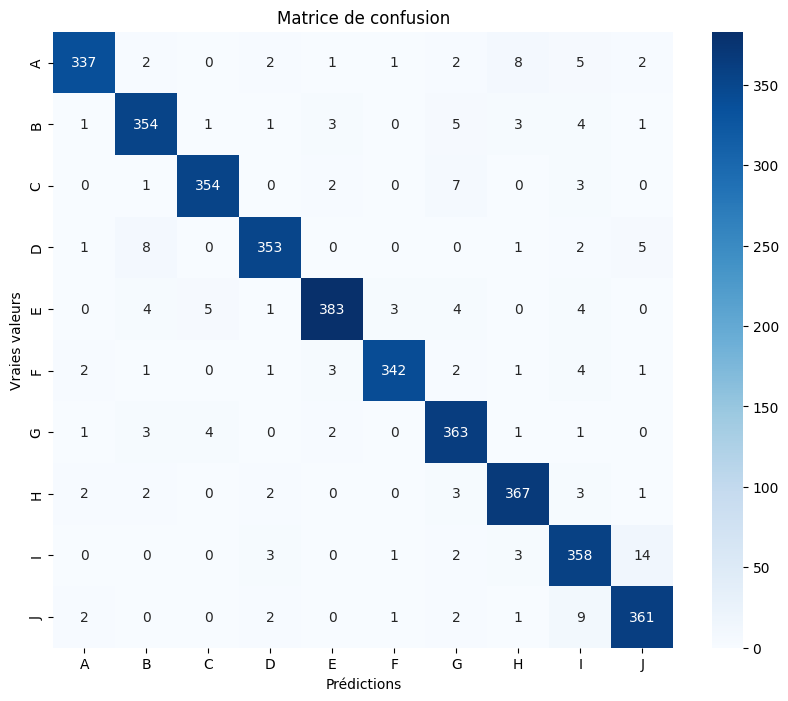

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

number_to_letter = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J'}

# Conversion des étiquettes en lettres
y_test_letters = label_encoder.inverse_transform(y_test)
y_pred_letters = label_encoder.inverse_transform(y_pred_classes)

# Générer la matrice de confusion
conf_matrix = confusion_matrix(y_test_letters, y_pred_letters)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=number_to_letter.values(), yticklabels=number_to_letter.values())
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')
plt.show()

### Diagonale Principale :

Les valeurs élevées observées sur la diagonale principale de la matrice de confusion indiquent que le modèle réussit à prédire correctement la majorité des instances pour chaque classe. C'est un indicateur positif, qui montre que globalement, le modèle est performant.

### Confusions Notables :

I et J : Une confusion modérée entre les lettres 'I' et 'J' est remarquée. Cela pourrait être attribué à leur ressemblance, particulièrement dans l'écriture manuscrite cursive ou lorsque le 'J' manque d'une queue distincte.

A et H : Les confusions entre 'A' et 'H' suggèrent que certaines caractéristiques distinctives de ces lettres ne sont pas complètement captées par le modèle. Ceci pourrait résulter des différentes façons dont ces lettres sont manuscrites par divers individus.

D et B : Une légère confusion entre 'D' et 'B' peut indiquer une difficulté à distinguer des formes arrondies et fermées.

C et G : Les erreurs entre 'C' et 'G' pourraient se produire si le 'G' manuscrit est parfois écrit sans sa queue ou si le 'C' est trop refermé.

En somme, malgré la bonne performance générale du modèle, une attention particulière aux classes où il y a le plus de confusion pourrait encore améliorer sa précision. Des ajustements spécifiques, basés sur une analyse détaillée des erreurs de classification, pourraient permettre une meilleure distinction entre les classes problématiques.

# GAN pour génerer les images

In [8]:
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)
np.random.seed(42)

X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. - 1. # reshape and rescale

codings_size = 100

### Generateur

In [9]:
generator = keras.models.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape=[codings_size]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME",
    activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="SAME",
    activation="tanh"),
])

### Discriminateur

In [10]:
discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="SAME",
    activation=keras.layers.LeakyReLU(0.2),
    input_shape=[28, 28, 1]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="SAME",
    activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])

In [11]:
gan = keras.models.Sequential([generator, discriminator])
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

### Affichage des images

In [12]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)

    plt.figure(figsize=(n_cols, n_rows))

    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

#enregistrement des images
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join("image", fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## entraînement

In [18]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers

    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))

        for X_batch in dataset:
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            
            generated_images = tf.cast(generated_images, tf.float64)
            X_batch = tf.cast(X_batch, tf.float64)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)

            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            
            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)

        plot_multiple_images(generated_images, 8)
        save_fig("not_mnist_plot"+str(epoch))

Epoch 1/50
Saving figure fashion_mnist_plot0
Epoch 2/50
Saving figure fashion_mnist_plot1
Epoch 3/50
Saving figure fashion_mnist_plot2
Epoch 4/50
Saving figure fashion_mnist_plot3
Epoch 5/50
Saving figure fashion_mnist_plot4
Epoch 6/50
Saving figure fashion_mnist_plot5
Epoch 7/50
Saving figure fashion_mnist_plot6
Epoch 8/50
Saving figure fashion_mnist_plot7
Epoch 9/50
Saving figure fashion_mnist_plot8
Epoch 10/50
Saving figure fashion_mnist_plot9
Epoch 11/50
Saving figure fashion_mnist_plot10
Epoch 12/50
Saving figure fashion_mnist_plot11
Epoch 13/50
Saving figure fashion_mnist_plot12
Epoch 14/50
Saving figure fashion_mnist_plot13
Epoch 15/50
Saving figure fashion_mnist_plot14
Epoch 16/50
Saving figure fashion_mnist_plot15
Epoch 17/50


KeyboardInterrupt: 

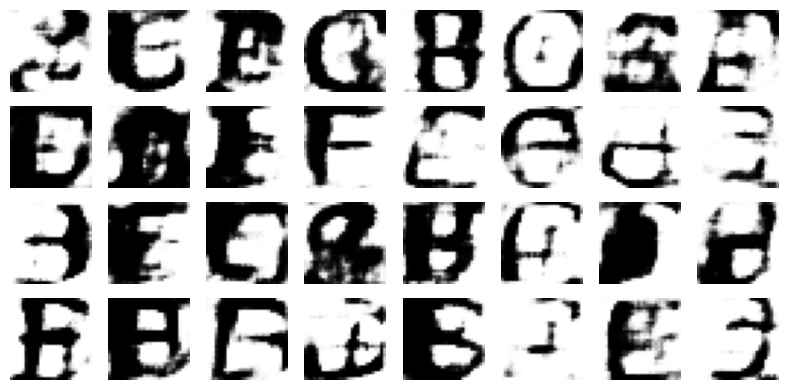

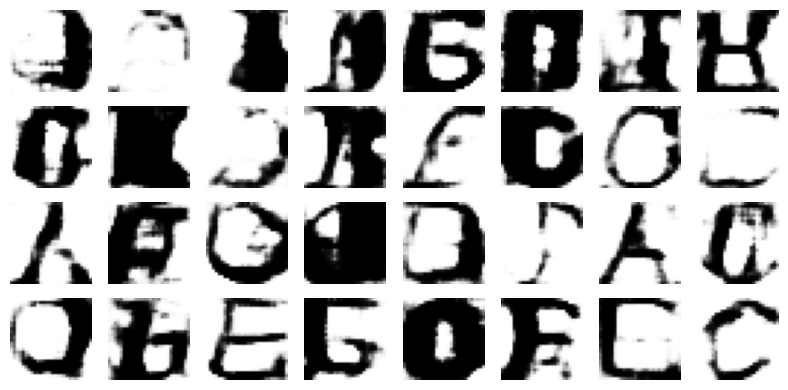

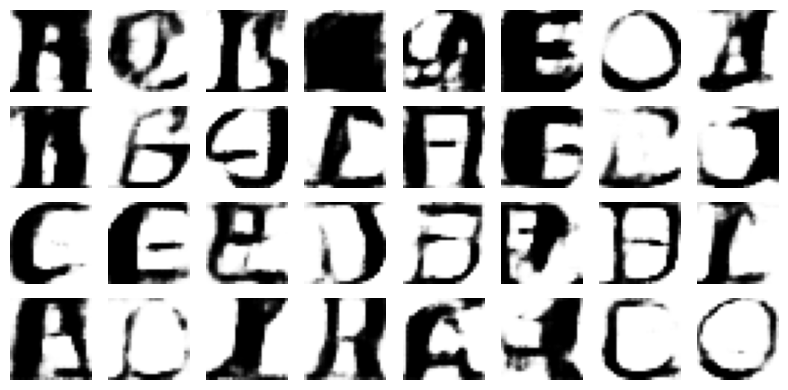

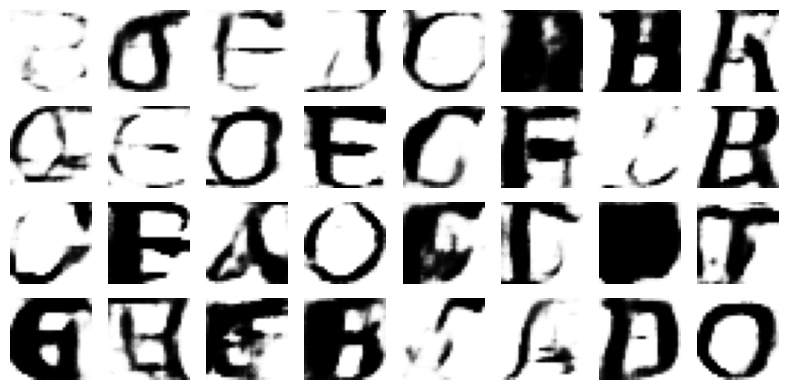

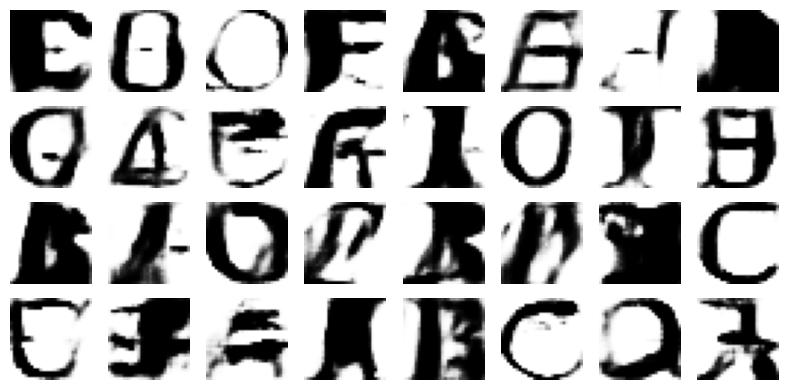

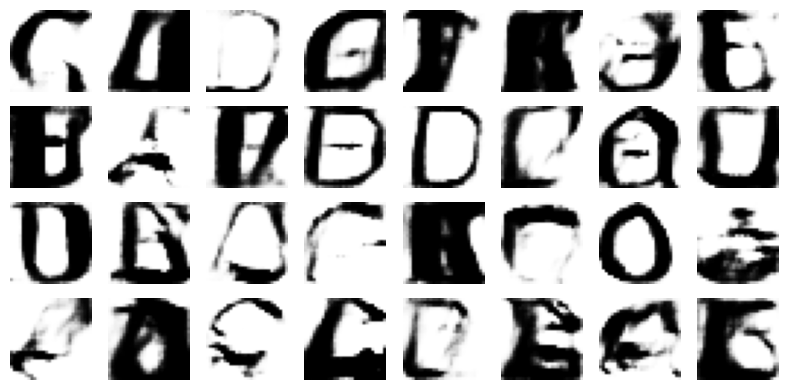

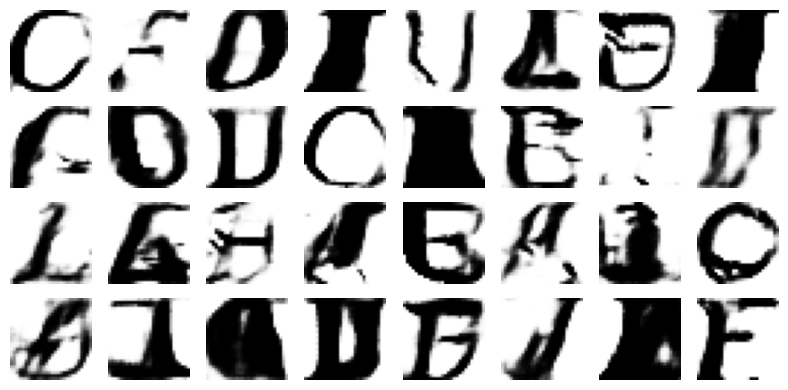

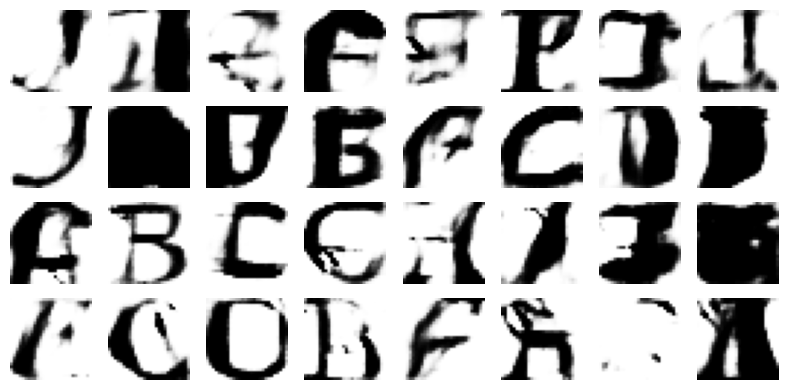

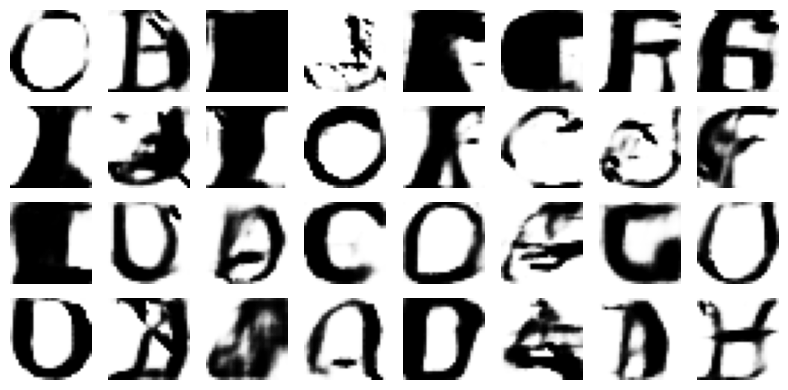

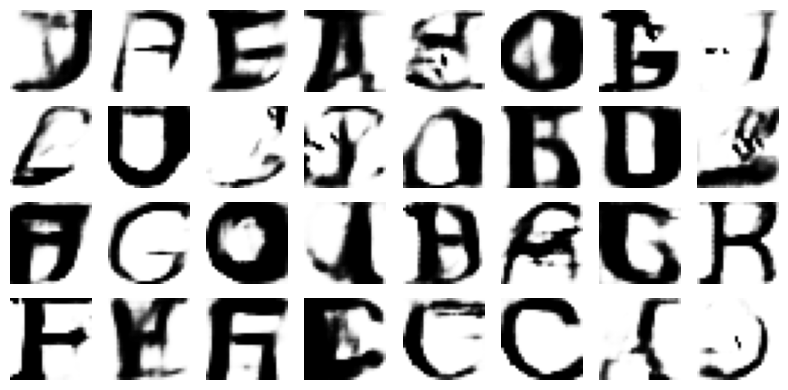

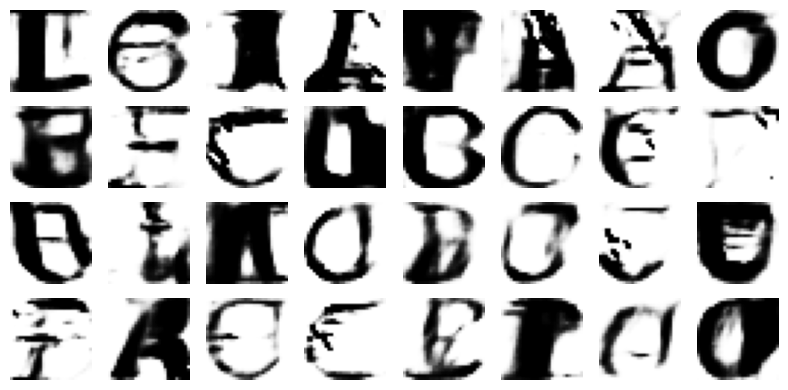

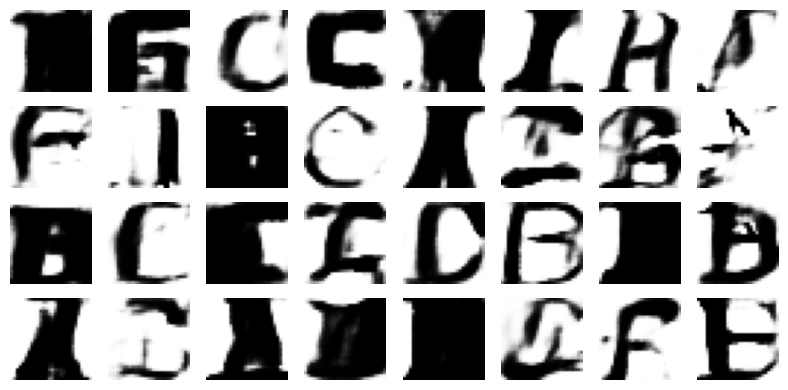

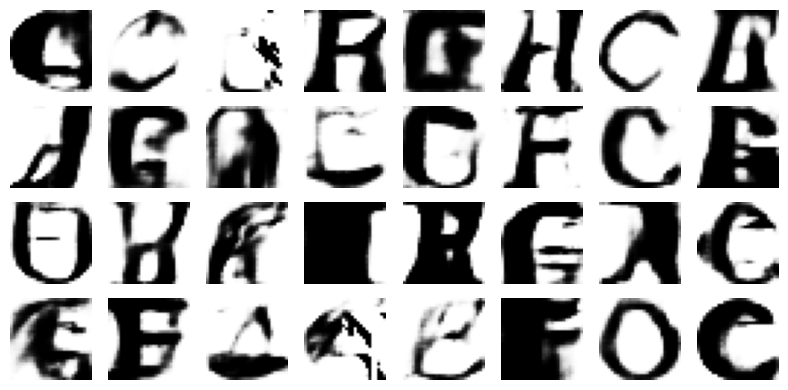

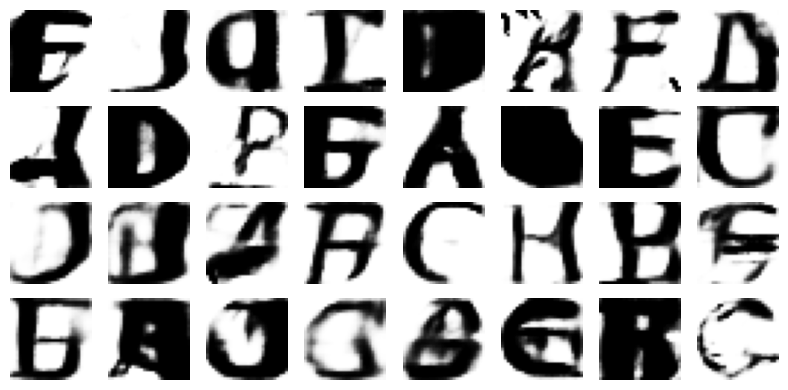

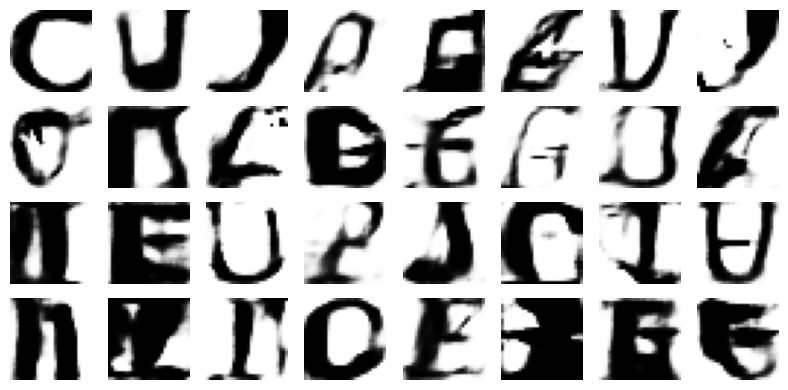

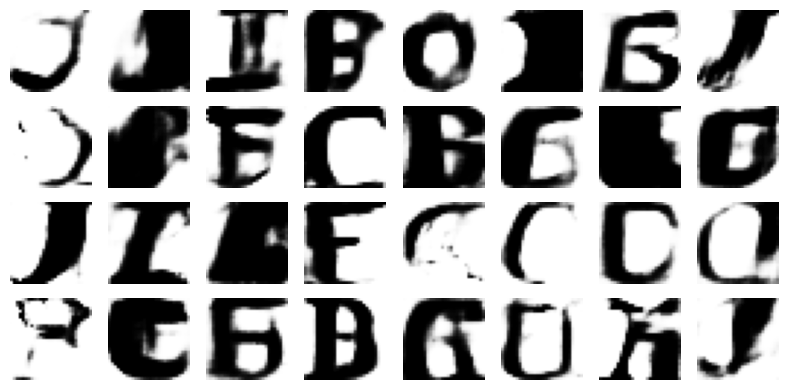

In [19]:
batch_size = 32

dataset = tf.data.Dataset.from_tensor_slices(X_train_dcgan)
dataset = dataset.shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)


train_gan(gan, dataset, batch_size, codings_size)

noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator(noise)

plot_multiple_images(generated_images, 8)
save_fig("dcgan_generated_images_plot", tight_layout=False)